# Thi kết thúc môn

## Thông tin học viên:
Họ và tên: Hồ Sĩ An Sơn
Lớp: MSE#11HCM
Mã Hv: 22MSE23060

# 1. (15 marks) – Image Histogram and Equalization

## a) Plot the original image and its histogram. Save this image as ‘Color_Histogram.jpeg

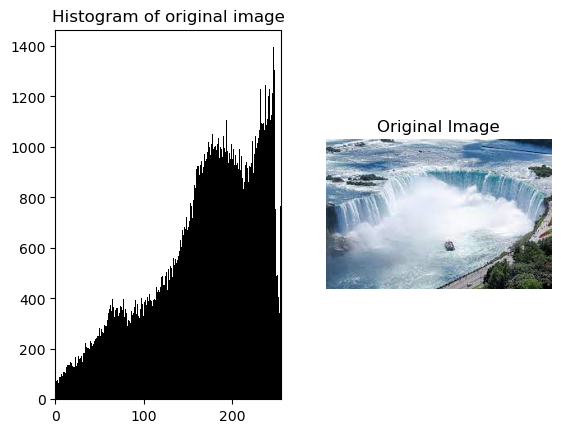

In [52]:
from matplotlib import pyplot as plt
from PIL import Image
import numpy as np
import os

# Load the image
image_path = './Data/Ex1.jfif'
image = Image.open(image_path)

# Convert image into a numpy array
image_array = np.array(image)

# Split the image into its respective bands, R, G, B
r, g, b = image_array[:, :, 0], image_array[:, :, 1], image_array[:, :, 2]

# Plot the original image
fig, ax = plt.subplots(1, 2)

# Histogram
# Flatten the arrays and combine them into a single array for the histogram
rgb_array = np.concatenate((r.flatten(), g.flatten(), b.flatten()))
ax[0].hist(rgb_array, bins=256, color='black', alpha=1)
ax[0].set_title('Histogram of original image')
ax[0].set_xlim([0, 255])

# Original image
ax[1].imshow(image)
ax[1].set_title('Original Image')
ax[1].axis('off')

# Save the figure
output_path = './Results/Color_Histogram.jpeg'
fig.savefig(output_path, bbox_inches='tight')


## (b) Display three primary components Red, Green and Blue of the original image. Recombine them in Blue, Red, Green order. Plot these images in the same figure and save as ‘Primary_Colors_and_BRG_Image.jpeg’

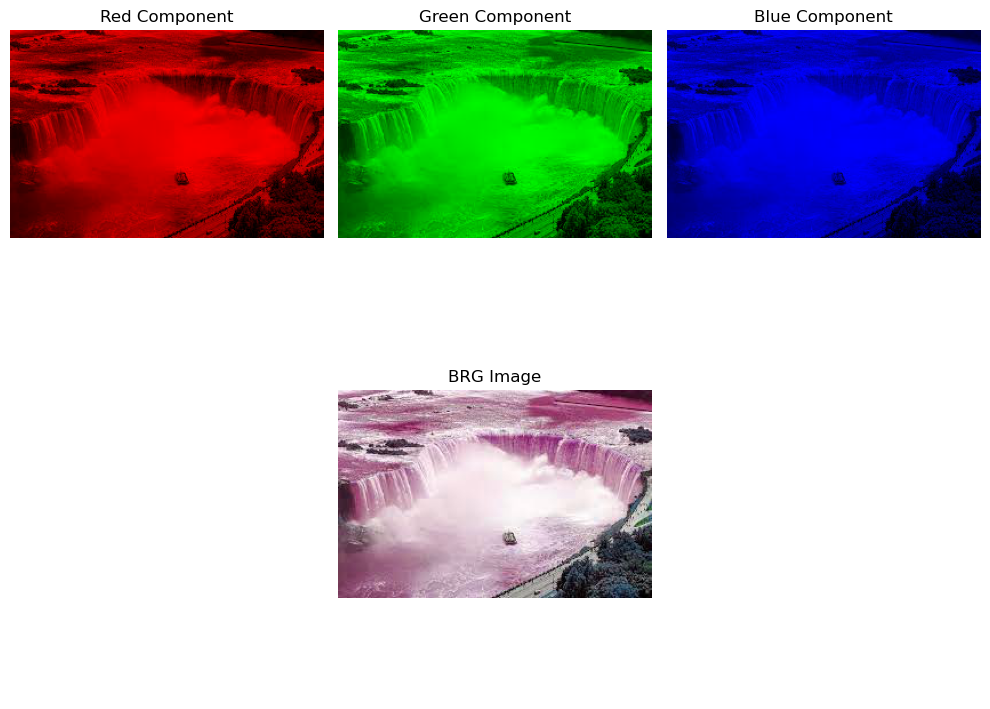

In [53]:
# Create zero matrices for the empty color channels
zeros = np.zeros(image_array.shape[:2], dtype="uint8")

# Create the Red, Green, Blue components with the respective channels
red_image = np.stack((r, zeros, zeros), axis=2)
green_image = np.stack((zeros, g, zeros), axis=2)
blue_image = np.stack((zeros, zeros, b), axis=2)

# Recombine them in Blue, Red, Green order
brg_image = np.stack((b, r, g), axis=2)

# Plot the color components and the recombined image
fig, ax = plt.subplots(2, 3, figsize=(10, 8))

# Red component
ax[0, 0].imshow(red_image)
ax[0, 0].set_title('Red Component')
ax[0, 0].axis('off')

# Green component
ax[0, 1].imshow(green_image)
ax[0, 1].set_title('Green Component')
ax[0, 1].axis('off')

# Blue component
ax[0, 2].imshow(blue_image)
ax[0, 2].set_title('Blue Component')
ax[0, 2].axis('off')

# BRG Image
ax[1, 0].axis('off')
ax[1, 2].axis('off')
ax[1, 1].imshow(brg_image)
ax[1, 1].set_title('BRG Image')
ax[1, 1].axis('off')

# Adjust layout to prevent overlapping
plt.tight_layout()

# Save the figure
output_path_brg = './Results/Primary_Colors_and_BRG_Image.jpeg'
fig.savefig(output_path_brg, bbox_inches='tight')


## c) Apply histogram equalization for the original image. Plot the image and its histogram after being equalized. Save this figure as ‘Equalization_Histogram.jpeg’

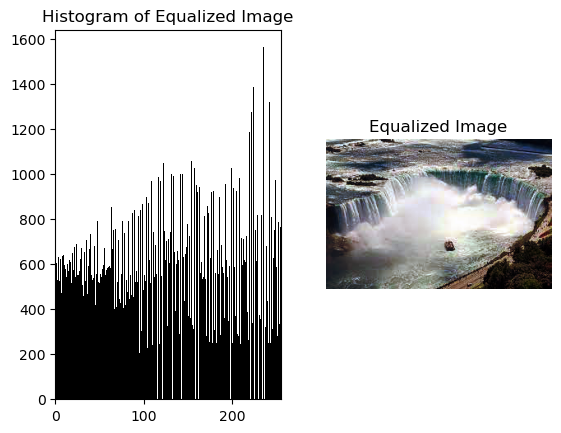

In [54]:
from skimage import exposure

# Apply histogram equalization to each color channel
equalized_r = exposure.equalize_hist(image_array[:, :, 0])
equalized_g = exposure.equalize_hist(image_array[:, :, 1])
equalized_b = exposure.equalize_hist(image_array[:, :, 2])
# Stack the channels back together
equalized_image_corrected = np.stack((equalized_r, equalized_g, equalized_b), axis=-1)

# Convert the equalized image to uint8 to display it with matplotlib
equalized_image_corrected_uint8 = (255 * equalized_image_corrected).astype(np.uint8)

# Flatten the equalized image array for histogram plotting
equalized_corrected_rgb_array = np.concatenate((equalized_image_corrected_uint8[:, :, 0].flatten(),
                                                equalized_image_corrected_uint8[:, :, 1].flatten(),
                                                equalized_image_corrected_uint8[:, :, 2].flatten()))

# Plot the equalized image and its histogram
fig, ax = plt.subplots(1, 2)

# Histogram of the equalized image
ax[0].hist(equalized_corrected_rgb_array, bins=256, color='black', alpha=1)
ax[0].set_title('Histogram of Equalized Image')
ax[0].set_xlim([0, 255])

# Equalized image
ax[1].imshow(equalized_image_corrected_uint8)
ax[1].set_title('Equalized Image')
ax[1].axis('off')

# Save the figure with the corrected histogram equalization
output_path_eq_corrected = './Results/Equalization_Histogram.jpeg'
fig.savefig(output_path_eq_corrected, bbox_inches='tight')



# 2. (25 marks) – Object Counting

## a) Read and display the original image

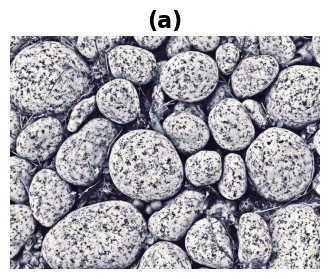

In [55]:
from PIL import Image
import matplotlib.pyplot as plt

# Load the image
image_path = './Data/Ex2.jpg'
original_image = Image.open(image_path)

# Display the original image
plt.figure(figsize=(4, 4))
plt.imshow(original_image)
plt.title('(a)', fontweight='bold', fontsize=16)
plt.axis('off')
plt.show()


## (b) Binarize the original image using Otsu method and display the binary image.

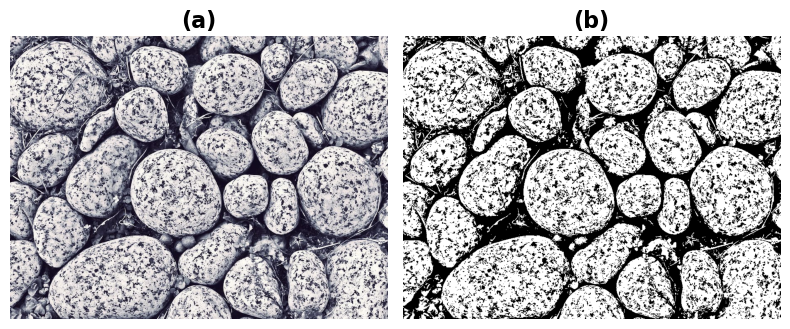

In [56]:
from skimage.filters import threshold_otsu
from skimage.color import rgb2gray
import numpy as np

# Convert the image to grayscale
gray_img = rgb2gray(original_image)

# Use Otsu's method to find the optimal threshold
thresh = threshold_otsu(gray_img)

# Binarize the image: pixels above the threshold are white, else black
binary_img = gray_img > thresh

fig, axes = plt.subplots(1, 2, figsize=(8, 8))

# Display the original image
axes[0].imshow(original_image)
axes[0].axis('off')
axes[0].set_title('(a)', fontweight='bold', fontsize=16)

# Display the binary image
axes[1].imshow(binary_img, cmap='gray')
axes[1].axis('off')
axes[1].set_title('(b)', fontweight='bold', fontsize=16)

# Show the figure with both images
plt.tight_layout()
plt.show()

# Display the binary image
# plt.figure(figsize=(4,4))
# plt.imshow(binary_img, cmap='gray')
# plt.title('(b)', fontweight='bold',fontsize=16)
# plt.axis('off')
# plt.show()


## c) Fill small holes in the binary image and display the filled image.

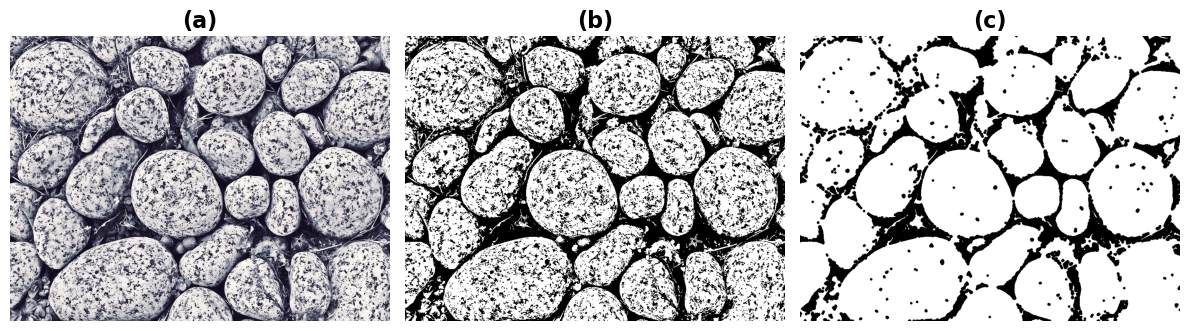

In [57]:
from skimage.morphology import binary_closing, disk

# Define the disk radius for the structuring element
radius = 3

# Create a disk structuring element
selem = disk(radius)

# Perform binary closing to fill small holes
filled_img = binary_closing(binary_img, selem)

fig, axes = plt.subplots(1, 3, figsize=(12, 12))

# Display the original image
axes[0].imshow(original_image)
axes[0].axis('off')
axes[0].set_title('(a)', fontweight='bold', fontsize=16)

# Display the binary image
axes[1].imshow(binary_img, cmap='gray')
axes[1].axis('off')
axes[1].set_title('(b)', fontweight='bold', fontsize=16)

# Display the filled image
axes[2].imshow(filled_img, cmap='gray')
axes[2].axis('off')
axes[2].set_title('(c)', fontweight='bold', fontsize=16)

# Show the figure with both images
plt.tight_layout()
plt.show()

## (d) Perform the erosion on the binary image using a diamond structuring element with size = 1

## (e) Apply region labeling on the eroded image to count number of stones in the original image. Print the result on the screen

# 3. (20 marks) – Denoise and Deblur a Noisy Blurry Grayscale Image

## a) Read and display the original image

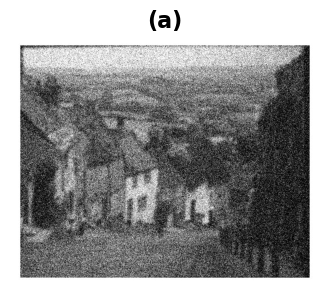

In [58]:
from PIL import Image
import matplotlib.pyplot as plt

# Load the image
image_path = './Data/Ex3.png'
original_image = Image.open(image_path)

# Display the original image
plt.figure(figsize=(4, 4))
plt.imshow(original_image, cmap='gray')
plt.title('(a)', fontweight='bold', fontsize=16)
plt.axis('off')
plt.show()


# 4. (25 marks) – Edge Detection and Hough Transform

## (a) Read and display the original image in color and grayscale format.

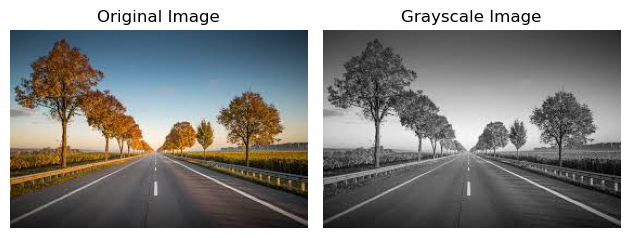

In [59]:
from PIL import Image
import matplotlib.pyplot as plt

# Load the image
image_path = './Data/Ex4.jpg'
original_image = Image.open(image_path)
img_gray = Image.open(image_path).convert('L')

fig, ax = plt.subplots(1, 2)

# Original image
ax[0].imshow(original_image, cmap='gray')
ax[0].set_title('Original Image')
ax[0].axis('off')

ax[1].imshow(img_gray, cmap='gray')
ax[1].set_title('Grayscale Image')
ax[1].axis('off')

plt.tight_layout()
plt.show()


# 5. (15 marks) – Key point Detection

## a) Read and display the original image in color and grayscale format.

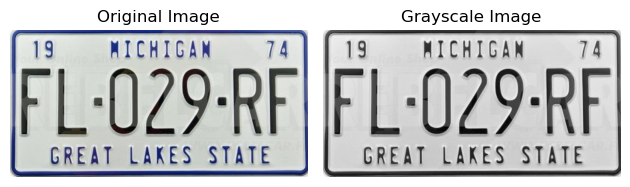

In [60]:
from PIL import Image
import matplotlib.pyplot as plt

# Load the image
image_path = './Data/Ex5.jpg'
original_image = Image.open(image_path)
img_gray = Image.open(image_path).convert('L')

fig, ax = plt.subplots(1, 2)

# Original image
ax[0].imshow(original_image, cmap='gray')
ax[0].set_title('Original Image')
ax[0].axis('off')

ax[1].imshow(img_gray, cmap='gray')
ax[1].set_title('Grayscale Image')
ax[1].axis('off')

plt.tight_layout()
plt.show()


In [62]:
import math

img_array = np.array(original_image)

# Define the logarithm transformation function
def logarithm_transformation(r, c):
    return c * np.log(1 + r)

# Define the piecewise linear transformation function
def piecewise_linear_transformation(r):
    if r <= 93:
        return 2 * r + 10
    elif r <= 168:
        return r - 5
    elif r <= 214:
        return r
    else:
        return 255

# Calculate the constant c for logarithm transformation
c = 256 / math.log(512)

# Apply the logarithm transformation
log_transformed = logarithm_transformation(original_image, c).astype(np.uint8)


TypeError: unsupported operand type(s) for +: 'int' and 'JpegImageFile'